In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("xy_data/yield_strength_dos_input.csv")
print("Shape of the dataset is: ", df.shape)

df.head()

Shape of the dataset is:  (312, 12)


,scaled_pc1,scaled_pc2,scaled_pc3,scaled_pc4,scaled_pc5,scaled_pc6,scaled_pc7,scaled_pc8,scaled_pc9,scaled_pc10,test_temperature,Yield_Strength
0,-2.128222,-0.111861,-0.144219,-0.298899,-0.172572,0.289257,0.011619,0.026314,0.030973,8.269839e-15,25.0,1250.0
1,-2.168256,-0.145037,-0.125630,-0.258841,-0.163676,0.262390,0.009980,0.015516,0.072297,8.269839e-15,25.0,1625.0
2,-2.204076,-0.174720,-0.108997,-0.223001,-0.155717,0.238351,0.008514,0.005855,0.109271,8.269839e-15,25.0,1260.0
3,-2.291998,-0.247580,-0.068171,-0.135028,-0.136180,0.179345,0.004915,-0.017860,0.200027,8.269839e-15,25.0,500.0
4,-2.236314,-0.201435,-0.094027,-0.190744,-0.148553,0.216715,0.007194,-0.002841,0.142548,8.269839e-15,25.0,1375.0


In [3]:
#  Outlier Removal Function
def remove_outliers(df):
    """
    Removes outliers from each column based on the IQR method.

    Parameters:
    df (DataFrame): Input dataframe.

    Returns:
    DataFrame: Cleaned dataframe with outliers removed.
    """
    df_cleaned = df.copy()
    for col in df.columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

# Apply outlier removal
df_cleaned = remove_outliers(df)
print(f"Dataset shape after outlier removal: {df_cleaned.shape}")
df_cleaned.head()

Dataset shape after outlier removal: (171, 12)


,scaled_pc1,scaled_pc2,scaled_pc3,scaled_pc4,scaled_pc5,scaled_pc6,scaled_pc7,scaled_pc8,scaled_pc9,scaled_pc10,test_temperature,Yield_Strength
4,-2.236314,-0.201435,-0.094027,-0.190744,-0.148553,0.216715,0.007194,-0.002841,0.142548,8.269839e-15,25.0,1375.0
5,-2.083183,-0.074538,-0.165133,-0.343963,-0.182579,0.319483,0.013463,0.038462,-0.015517,8.269839e-15,25.0,1200.0
8,1.935686,-0.139797,-0.066622,-0.024199,0.019153,0.278043,-0.046675,0.060347,0.172245,8.269839e-15,25.0,991.0
14,0.109777,0.161555,-0.128763,-0.136615,-0.072681,-0.031729,-0.026491,0.142243,0.194402,8.269839e-15,25.0,2197.0
15,0.109777,0.161555,-0.128763,-0.136615,-0.072681,-0.031729,-0.026491,0.142243,0.194402,8.269839e-15,1000.0,745.0


In [4]:
principal_component_cols = [col for col in df_cleaned.columns if col.startswith('scaled_pc')]
feature_columns = principal_component_cols + ['test_temperature']
target_column = 'Yield_Strength'

X = df_cleaned[feature_columns]
y = df_cleaned[target_column]

In [5]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_columns)

X_scaled.head()

,scaled_pc1,scaled_pc2,scaled_pc3,scaled_pc4,scaled_pc5,scaled_pc6,scaled_pc7,scaled_pc8,scaled_pc9,scaled_pc10,test_temperature
0,0.000000,0.201193,0.425951,0.323891,0.178733,0.699636,0.670061,0.003181,0.683124,1.151737e-28,0.157213
1,0.025882,0.286191,0.288613,0.062216,0.040523,0.937010,0.697175,0.139421,0.237783,5.679799e-29,0.157213
2,0.705145,0.242480,0.478884,0.608324,0.859944,0.841290,0.437048,0.211611,0.766792,1.388395e-28,0.157213
3,0.396533,0.444330,0.358861,0.416335,0.486920,0.125776,0.524354,0.481749,0.829217,1.372618e-28,0.157213
4,0.396533,0.444330,0.358861,0.416335,0.486920,0.125776,0.524354,0.481749,0.829217,1.372618e-28,0.678938


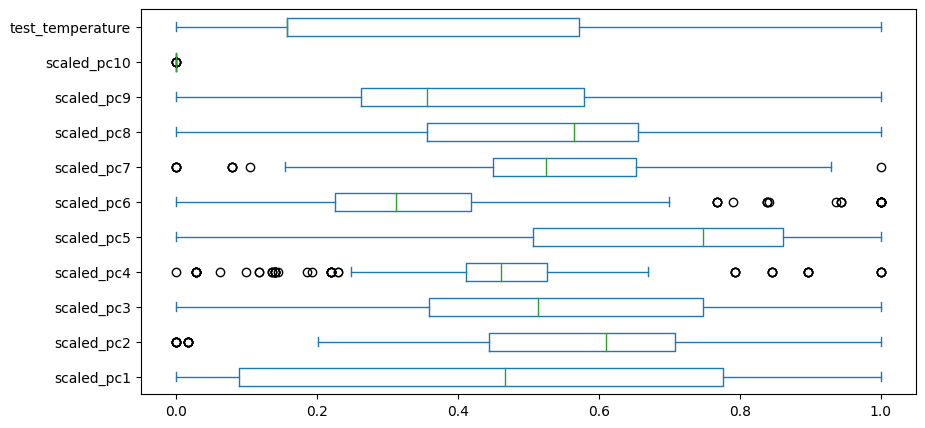

In [6]:
X_scaled.plot.box(figsize=(10, 5), vert=False)
#plt.title("Feature Value Distribution After Scaling")
plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Random Forest Model Evaluation:
MAE: 168.42
MSE: 48132.97
RMSE: 219.39
R² Score: 0.851


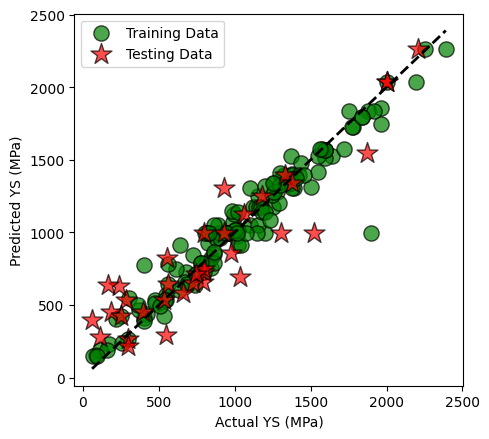

In [9]:
plt.figure(figsize=(5, 4.5))

plt.scatter(y_train, rf_model.predict(X_train), color='green', label='Training Data', edgecolor='k', s=120, alpha=0.7)
plt.scatter(y_test, y_pred, color='red', label='Testing Data', edgecolor='k', s=250, alpha=0.7, marker='*')

# Ideal Line
min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

plt.xlabel('Actual YS (MPa)')
plt.ylabel('Predicted YS (MPa)')

plt.tight_layout()
plt.legend()
plt.show()

In [10]:
# Import regression models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, 
    HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor
)
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
    ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [11]:
# Extended list of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet Regression": ElasticNet(random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(random_state=42),
    "RANSAC Regressor": RANSACRegressor(random_state=42),
    "TheilSen Regressor": TheilSenRegressor(random_state=42),
    "PLS Regression": PLSRegression(n_components=2),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

In [12]:
def evaluate_and_visualize_models(models, X_train, y_train, X_test, y_test):
    """
    Train and evaluate multiple regression models and visualize actual vs predicted values
    with R² scores displayed in subplots. Also includes training and testing MAE, MSE, RMSE.

    Parameters:
    - models: Dictionary of regression model names and their corresponding instances.
    - X_train, y_train: Training data and labels.
    - X_test, y_test: Testing data and labels.

    Returns:
    - DataFrame with model evaluation metrics.
    """
    results = []
    n_models = len(models)
    n_cols = 3  # Number of subplots per row
    n_rows = int(np.ceil(n_models / n_cols))  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for idx, (name, model) in enumerate(models.items()):
        # Train the model
        model.fit(X_train, y_train)

        # Predict on train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate the model
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Training metrics
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)

        # Testing metrics
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        # Store results
        results.append({
            "Model": name,
            "Train MAE": train_mae,
            "Train R²": train_r2,
            
            "Test MAE": test_mae,
            "Test R²": test_r2,
            
            "Train MSE": train_mse,
            "Train RMSE": train_rmse,
            "Test MSE": test_mse,
            "Test RMSE": test_rmse,
        })

        # Plot Actual vs Predicted in the subplot
        ax = axes[idx]
        ax.scatter(y_train, y_train_pred, color="blue", alpha=1, label="Training Data", edgecolor="k")
        ax.scatter(y_test, y_test_pred, color="red", alpha=1, label="Testing Data", edgecolor="k")
        ax.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
                [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
                "k--", lw=1)
        ax.set_title(f"{name}\nTrain R²: {train_r2:.3f} | Test R²: {test_r2:.3f}", fontsize=10)
        ax.set_xlabel("Actual Yield Strength")
        ax.set_ylabel("Predicted Yield Strength")
        ax.legend()

    # Turn off unused subplots
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # Return results as a sorted DataFrame for better analysis
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Test R²", ascending=False)

    return results_df

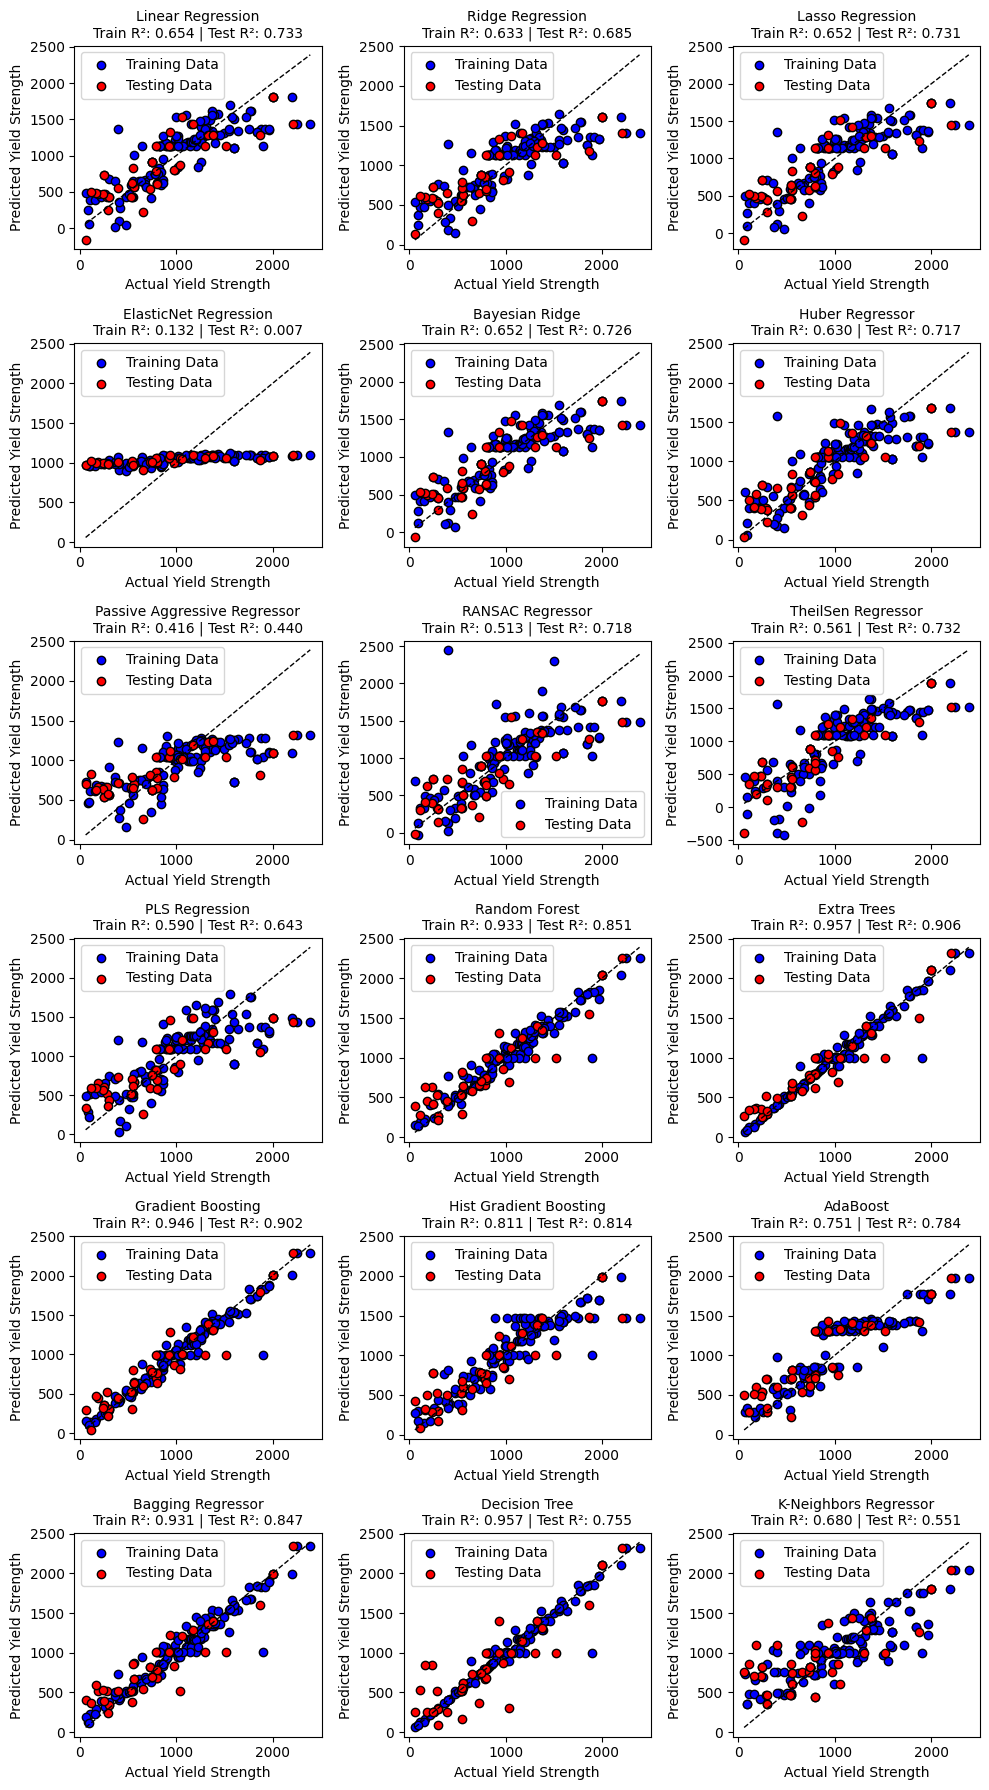

In [13]:
# Evaluate and visualize all models
results_df = evaluate_and_visualize_models(models, X_train, y_train, X_test, y_test)

In [14]:
results_df = results_df.round(3)
results_df.to_csv("results/YS_dos_results.csv", index=False)
results_df

,Model,Train MAE,Train R²,Test MAE,Test R²,Train MSE,Train RMSE,Test MSE,Test RMSE
11,Extra Trees,43.645,0.957,127.788,0.906,10454.940,102.249,30203.626,173.792
12,Gradient Boosting,71.918,0.946,133.790,0.902,13306.346,115.353,31596.318,177.754
10,Random Forest,84.584,0.933,168.417,0.851,16336.014,127.812,48132.972,219.392
15,Bagging Regressor,83.280,0.931,174.064,0.847,16924.717,130.095,49479.993,222.441
13,Hist Gradient Boosting,148.121,0.811,174.817,0.814,46201.473,214.945,59872.004,244.688
14,AdaBoost,201.110,0.751,218.094,0.784,60903.966,246.787,69587.058,263.794
16,Decision Tree,43.645,0.957,196.843,0.755,10454.940,102.249,79156.852,281.348
0,Linear Regression,221.747,0.654,242.726,0.733,84560.000,290.792,86093.249,293.417
8,TheilSen Regressor,252.650,0.561,225.276,0.732,107143.020,327.327,86351.478,293.856
2,Lasso Regression,220.703,0.652,242.419,0.731,84903.477,291.382,86769.439,294.567



Gradient Boosting Model Evaluation:
Training Data - R²: 0.946, MAE: 71.92, MSE: 13306.35, RMSE: 115.35
Testing Data  - R²: 0.902, MAE: 133.79, MSE: 31596.32, RMSE: 177.75


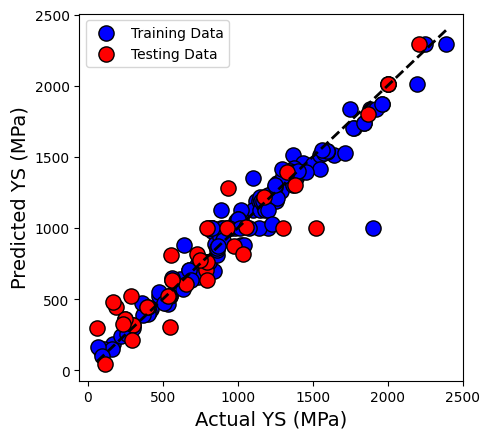

In [15]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred_gb)
mse_train = mean_squared_error(y_train, y_train_pred_gb)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_gb)

# Evaluate the model on testing data
mae_test = mean_absolute_error(y_test, y_test_pred_gb)
mse_test = mean_squared_error(y_test, y_test_pred_gb)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_gb)

# Print evaluation metrics
print("\nGradient Boosting Model Evaluation:")
print(f"Training Data - R²: {r2_train:.3f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Testing Data  - R²: {r2_test:.3f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")

# Plot Actual vs. Predicted Values
plt.figure(figsize=(5, 4.5))

# Training data
plt.scatter(y_train, y_train_pred_gb, color='blue', label='Training Data', edgecolor='k', s=120)

# Testing data
plt.scatter(y_test, y_test_pred_gb, color='red', label='Testing Data', edgecolor='k', s=120)

# Ideal Line
min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# Customize the plot
plt.xlabel("Actual YS (MPa)", fontsize=14)
plt.ylabel("Predicted YS (MPa)", fontsize=14)

plt.legend()
plt.tight_layout()

plt.savefig("figures/gb_model_YS_actual_vs_predicted_dos_input.png", dpi=500, bbox_inches='tight')
plt.show()


Extra Trees Model Evaluation:
Training Data - R²: 0.957, MAE: 43.64, MSE: 10454.94, RMSE: 102.25
Testing Data  - R²: 0.906, MAE: 127.79, MSE: 30203.63, RMSE: 173.79


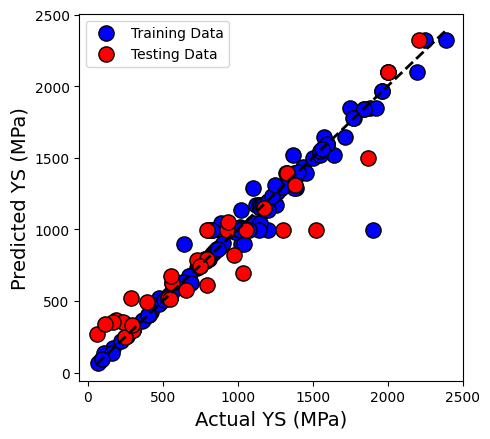

In [16]:
# Initialize and train the Extra Trees model
et_model = ExtraTreesRegressor(random_state=42)  # You can adjust n_estimators
et_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_et = et_model.predict(X_train)
y_test_pred_et = et_model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred_et)
mse_train = mean_squared_error(y_train, y_train_pred_et)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_et)

# Evaluate the model on testing data
mae_test = mean_absolute_error(y_test, y_test_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_et)

# Print evaluation metrics
print("\nExtra Trees Model Evaluation:")
print(f"Training Data - R²: {r2_train:.3f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Testing Data  - R²: {r2_test:.3f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")

# Plot Actual vs. Predicted Values
plt.figure(figsize=(5, 4.5))

# Training data
plt.scatter(y_train, y_train_pred_et, color='blue', label='Training Data', edgecolor='k', s=120)

# Testing data
plt.scatter(y_test, y_test_pred_et, color='red', label='Testing Data', edgecolor='k', s=120)

# Ideal Line
min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# Customize the plot
plt.xlabel("Actual YS (MPa)", fontsize=14)
plt.ylabel("Predicted YS (MPa)", fontsize=14)

plt.legend()
plt.tight_layout()

plt.savefig("figures/et_model_YS_actual_vs_predicted_dos_input.png", dpi=500, bbox_inches='tight')
plt.show()

In [17]:
from sklearn.linear_model import Lasso


Lasso Regression Model Evaluation:
Train R²: 0.652
Test R²: 0.731
MAE: 242.419
MSE: 86769.439
RMSE: 294.567


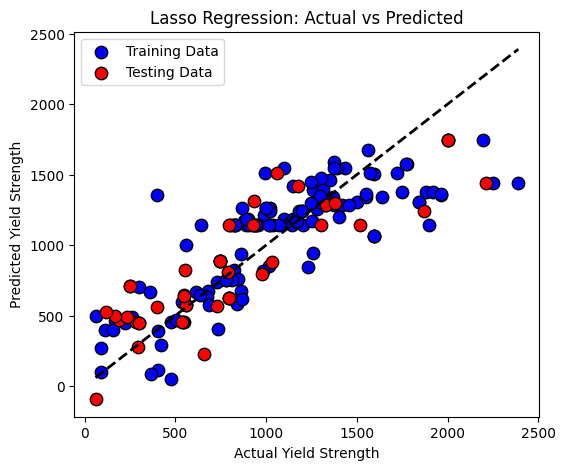

In [18]:
best_lasso = Lasso(alpha=1, random_state=42)
best_lasso.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

# Model Performance Metrics
lasso_metrics = {
    "Train R²": r2_score(y_train, y_train_pred),
    "Test R²": r2_score(y_test, y_test_pred),
    "MAE": mean_absolute_error(y_test, y_test_pred),
    "MSE": mean_squared_error(y_test, y_test_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
}

print("\nLasso Regression Model Evaluation:")
for metric, value in lasso_metrics.items():
    print(f"{metric}: {value:.3f}")

# %% Plot Lasso Regression Predictions
plt.figure(figsize=(6, 5))

plt.scatter(y_train, y_train_pred, color="blue", label="Training Data", edgecolor="k", s=80)
plt.scatter(y_test, y_test_pred, color="red", label="Testing Data", edgecolor="k", s=80)

plt.plot([min_val, max_val], [min_val, max_val], "k--", lw=2)

plt.xlabel("Actual Yield Strength")
plt.ylabel("Predicted Yield Strength")
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [19]:
lasso_coefficients = pd.Series(best_lasso.coef_, index=feature_columns)
lasso_coefficients.sort_values(ascending=False)

scaled_pc9           306.536821
scaled_pc10           -0.000000
scaled_pc4           -33.297077
scaled_pc5           -92.777143
scaled_pc7          -101.452275
scaled_pc1          -207.087248
scaled_pc3          -225.642197
scaled_pc2          -327.247427
scaled_pc8          -329.992022
scaled_pc6          -761.963894
test_temperature   -1654.260585
dtype: float64

In [20]:
intercept = best_lasso.intercept_
intercept

2429.70385496385